<a href="https://colab.research.google.com/github/msnyd/DS-Unit-1-Sprint-2-Statistics/blob/master/Matthew_Snyder_Sprint_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

Hint: If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function.

In [37]:
# TODO
import pandas as pd
import numpy as np

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header = None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [38]:
column_headers = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 
                  'A12', 'A13', 'A14', 'A15', 'A16']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header = None, names = column_headers)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [39]:
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [40]:
pd.to_numeric(df['A2'], downcast='signed', errors = 'coerce')

0      30.83
1      58.67
2      24.50
3      27.83
4      20.17
       ...  
685    21.08
686    22.67
687    25.25
688    17.92
689    35.00
Name: A2, Length: 690, dtype: float64

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [42]:
# TODO

df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [0]:
def confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.nanmean(a), scipy.stats.sem(a, nan_policy='omit')
    h = se * scipy.stats.t.ppf((1 + confidence) / 2, n-1)

    return [m,m-h,m+h]

In [77]:
a2 = pd.to_numeric(pd.Series(df['A2']), errors = 'coerce')
a2.isnull().sum()

12

In [79]:
a14 = pd.to_numeric(pd.Series(df['A14']), errors = 'coerce')
a14.dropna()
a14.isnull().sum()

# Not sure why but not saving to my dataframe, so just put them as variables and moved on

13

In [70]:
df.dtypes #????????????
#WHY ISNT THIS BEING SAVED TO THE DATAFRAME?

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

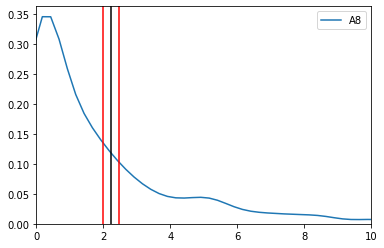

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy import stats

CI = confidence_interval(df['A8'])
plt.xlim(0, 10)
sns.kdeplot(df['A8'])
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

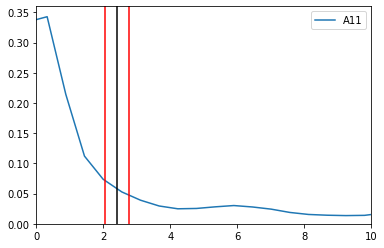

In [64]:
CI = confidence_interval(df['A11'])
plt.xlim(0, 10)
sns.kdeplot(df['A11'])
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

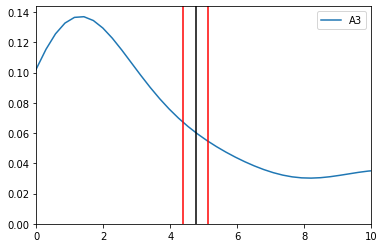

In [68]:
CI = confidence_interval(df['A3'])
plt.xlim(0, 10)
sns.kdeplot(df['A3'])
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


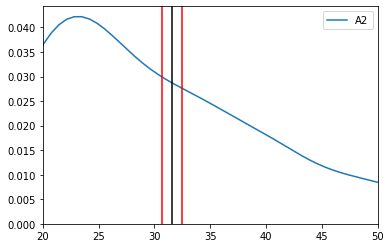

In [90]:
CI = confidence_interval(a2.dropna())
plt.xlim(20, 50)
sns.kdeplot(a2)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


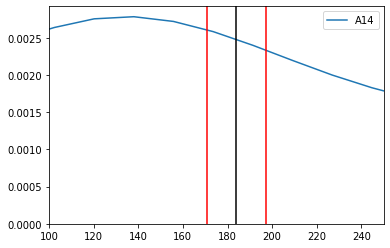

In [95]:
CI = confidence_interval(a14.dropna())
plt.xlim(100,250)
sns.kdeplot(a14)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

In [81]:
stats.ttest_ind(a2.dropna(), a14.dropna())

Ttest_indResult(statistic=-22.784484544569636, pvalue=1.5890328270485545e-97)

In [82]:
stats.ttest_ind(a14.dropna(), df['A15'])

Ttest_indResult(statistic=-4.159549931306314, pvalue=3.387769001951734e-05)

In [67]:
stats.ttest_ind(df['A11'], df['A8']) ###Statistical significance

Ttest_indResult(statistic=0.7858075329285187, pvalue=0.43211534709421795)

In [97]:
stats.ttest_ind(df['A3'], df['A11'])

Ttest_indResult(statistic=8.903140583809282, pvalue=1.6735067464491046e-18)

In [103]:
### CHI SQUARED TESTS ###
### A9, A10, and A12
observed = pd.crosstab(df['A10'], df['A9'])
observed

A9,f,t
A10,,
f,262,133
t,67,228


In [102]:
observed_with_margins = pd.crosstab(df['A9'], df['A10'], margins=True)

observed_with_margins

A10,f,t,All
A9,,,
f,262,67,329
t,133,228,361
All,395,295,690


In [106]:
stats.chi2_contingency(observed)

(127.0473385738199,
 1.813947266862159e-29,
 1,
 array([[188.34057971, 206.65942029],
        [140.65942029, 154.34057971]]))

In [107]:
stats.chi2_contingency(observed_with_margins)

(128.78985489762098,
 7.066142781292754e-27,
 4,
 array([[188.34057971, 140.65942029, 329.        ],
        [206.65942029, 154.34057971, 361.        ],
        [395.        , 295.        , 690.        ]]))

In [119]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(observed_with_margins)

def chisquare(columna, columnb):
  data = pd.crosstab(columna, columnb, margins=True)
  chi2_stat, p_val, dof, ex = stats.chi2_contingency(data)
  print("===Chi2 Stat===")
  print(chi2_stat)
  print("\n")
  print("===Degrees of Freedom===")
  print(dof)
  print("\n")
  print("===P-Value===")
  print(p_val)
  print("\n")
  print("===Contingency Table===")
  print(ex)

chisquare(df['A9'], df['A10'])

===Chi2 Stat===
128.78985489762098


===Degrees of Freedom===
4


===P-Value===
7.066142781292754e-27


===Contingency Table===
[[188.34057971 140.65942029 329.        ]
 [206.65942029 154.34057971 361.        ]
 [395.         295.         690.        ]]


In [121]:
chisquare(df['A9'], df['A12'])

===Chi2 Stat===
5.748572811904011


===Degrees of Freedom===
4


===P-Value===
0.21872830989906428


===Contingency Table===
[[178.32753623 150.67246377 329.        ]
 [195.67246377 165.32753623 361.        ]
 [374.         316.         690.        ]]


In [122]:
chisquare(df['A10'], df['A12'])

===Chi2 Stat===
0.2004154903572346


===Degrees of Freedom===
4


===P-Value===
0.9953023447080593


===Contingency Table===
[[214.10144928 180.89855072 395.        ]
 [159.89855072 135.10144928 295.        ]
 [374.         316.         690.        ]]


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

*Your words here!*

So for me, since we don't know what the exact variables mean, it is hard for me to conceptualize a strong link between the two data sets, but I suppose that might be the point of doing this.  To think of it in more of a pure mathenmatical sense than having a real life component to whatever we are studying.  

With that being said, I did find statistical significance within a couple of the columns when comparing them.  When running the numeric columns, I tried to run columns that had their values within a certain range.  For example, looking at columns A8 and A11 you can clearly see a numeric similarity between the 2 as opposed to columns like A2 and A14 which had a very very low p-value.

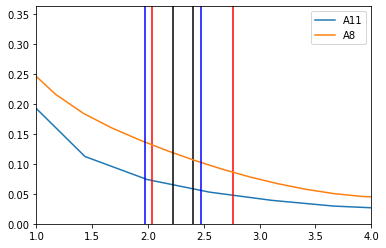

In [125]:
## A graph comparing the Confidence Intervals of A8 and A11

CI = confidence_interval(df['A11'])
plt.xlim(1, 4)
sns.kdeplot(df['A11'])
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

CI = confidence_interval(df['A8'])
sns.kdeplot(df['A8'])
plt.axvline(x=CI[1], color='blue')
plt.axvline(x=CI[2], color='blue')
plt.axvline(x=CI[0], color='k');

So looking at that graph, we can see both confidence intervals fall within the ranges of eachother.  With that being said, this does not mean there is an automatic correlation however it could mean that if it could mean that these two datasets could be from the same group just a different sample.

We fail to reject the null hypothesis.

Looking at the other example mentioned, A2 and A14, we should see a graph that is miles apart from any type of correlation.

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


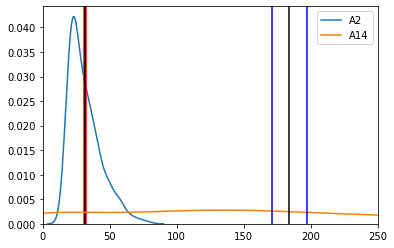

In [129]:
CI = confidence_interval(a2.dropna())
plt.xlim(0, 250)
sns.kdeplot(a2)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

CI = confidence_interval(a14.dropna())
sns.kdeplot(a14)
plt.axvline(x=CI[1], color='blue')
plt.axvline(x=CI[2], color='blue')
plt.axvline(x=CI[0], color='k');

So looking at where the mean confidence interval with these 2 data sets, we can clearly see there is no correlation between these 2 sets.

We reject the null hypothesis

Moving onto the categorical data, I mainly focused on the tables that had the same output, which 3 of the datasets happened to share the same 't' and 'f' output, being A9, A10, and A12.  First let's start with data sets that have a very strong correlation.

In [130]:
chisquare(df['A10'], df['A12'])  #calls back to a previous function i wrote

===Chi2 Stat===
0.2004154903572346


===Degrees of Freedom===
4


===P-Value===
0.9953023447080593


===Contingency Table===
[[214.10144928 180.89855072 395.        ]
 [159.89855072 135.10144928 295.        ]
 [374.         316.         690.        ]]


So as we can see just by lookinng at the p-value, there is a very strong correlation between these two data.  And looking at the chi square stat, we would see that our observed data fits are expected data extremely well. 

We fail to reject the null hypothesis.

Looking on the opposite side of the coin, we could compare A9 and A10.

In [132]:
chisquare(df['A9'], df['A10'])

===Chi2 Stat===
128.78985489762098


===Degrees of Freedom===
4


===P-Value===
7.066142781292754e-27


===Contingency Table===
[[188.34057971 140.65942029 329.        ]
 [206.65942029 154.34057971 361.        ]
 [395.         295.         690.        ]]


So with the same degrees of freedom, the chi square stat and our p value is very different than our previous test.  This indicates that our observed data does not fit our expected data very well and our p-value shows indicates to us that there is very strong evidence against the null hypothesis.

We reject the null hypothesis.